# Importation des données sous forme de graph

In [18]:
import networkx as nx
import numpy as np
import csv
import matplotlib.pyplot as plt

In [12]:
# First read and create the graph using the training dataset
G = nx.Graph()
with open("../data/training.txt", "r") as f:
    for line in f:
        line = line.split()
        if line[2] == '1':
            G.add_edge(line[0], line[1])
print("Training Graph Created")

Training Graph Created


# Plot the network doe

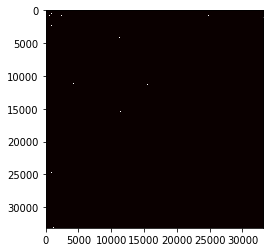

In [20]:
adj_matrix = nx.to_numpy_matrix(G, dtype=np.bool)
plt.imshow(adj_matrix, cmap='hot')
plt.show()

In [ ]:
predictions = []
# For each edge on the testing dataset calculate the jaccard coefficient and use a threshold to decide
with open("../data/testing.txt", "r") as f:
    for line in f:
        line = line.split()
        coef = [[u, v, p]for u, v, p in nx.jaccard_coefficient(G, [(line[0], line[1])])][0]
        if  coef[2] > 0.005:
            predictions.append("1")
        else:
            predictions.append("0")

predictions = zip(range(len(predictions)), predictions)
# Write the output in the format required by Kaggle
with open("jaccard_predictions.csv","w") as pred:
    csv_out = csv.writer(pred)
    csv_out.writerow(['id','predicted'])
    for row in predictions:
        csv_out.writerow(row) 

283623
